# Objetivo:

- Prever se o novo cliente se encaixa em um baixo ou alto limite de cartão de crédito, classificando-os como alto limite ou não.

#### Subobjetivos:

- Identificar o melhor modelo de análise preditiva para atingir o objetivo.
- Determinar o melhor limite de cartão de crédito para iniciar o relacionamento com o cliente.
- Analisar as variáveis que influenciam no endividamento dos clientes.

#### Cenário de adoção de alto limite:

- Será adotado um limite de cartão de crédito acima de 4549 como critério para classificar os clientes como de alto limite.

## Resumo:

O objetivo do projeto é utilizar técnicas de análise preditiva para prever se os novos clientes se encaixam em um alto ou baixo limite de cartão de crédito. Será escolhido o melhor modelo de análise preditiva para atingir esse objetivo e determinar o limite de cartão de crédito mais adequado para o início do relacionamento com o cliente. O critério para considerar um cliente como de alto limite será um valor acima de 4549 de limite de cartão de crédito. Além disso, serão analisadas as variáveis que influenciam no endividamento dos clientes para auxiliar na tomada de decisão.

# Projeto:

In [1]:
import pandas as pd 
dados = pd.read_csv('dadosprontos.csv')
dados

,Unnamed: 0,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao
0,0,45,M,3,High School,Married,$60K - $80K,12691.0
1,1,49,F,5,Graduate,Single,Less than $40K,8256.0
2,2,51,M,3,Graduate,Married,$80K - $120K,3418.0
3,3,40,F,4,High School,Unknown,Less than $40K,3313.0
4,4,40,M,3,Uneducated,Married,$60K - $80K,4716.0
...,...,...,...,...,...,...,...,...
10122,10122,50,M,2,Graduate,Single,$40K - $60K,4003.0
10123,10123,41,M,2,Unknown,Divorced,$40K - $60K,4277.0
10124,10124,44,F,1,High School,Married,Less than $40K,5409.0
10125,10125,30,M,2,Graduate,Unknown,$40K - $60K,5281.0


In [2]:
# excluindo coluna de índice
dados.drop(columns=['Unnamed: 0'], inplace=True)
dados

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao
0,45,M,3,High School,Married,$60K - $80K,12691.0
1,49,F,5,Graduate,Single,Less than $40K,8256.0
2,51,M,3,Graduate,Married,$80K - $120K,3418.0
3,40,F,4,High School,Unknown,Less than $40K,3313.0
4,40,M,3,Uneducated,Married,$60K - $80K,4716.0
...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,4003.0
10123,41,M,2,Unknown,Divorced,$40K - $60K,4277.0
10124,44,F,1,High School,Married,Less than $40K,5409.0
10125,30,M,2,Graduate,Unknown,$40K - $60K,5281.0


In [3]:
dados.limite_do_cartao.describe()
# analisando a coluna limite_do_cartao

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: limite_do_cartao, dtype: float64

In [4]:
# transformar a coluna limite_do_cartao em inteiro
dados['limite_do_cartao'] = dados['limite_do_cartao'].astype(int)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Idade              10127 non-null  int64 
 1   Sexo               10127 non-null  object
 2   Dependentes        10127 non-null  int64 
 3   Nivel_educacional  10127 non-null  object
 4   Estado_civil       10127 non-null  object
 5   Renda              10127 non-null  object
 6   limite_do_cartao   10127 non-null  int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 514.4+ KB


In [5]:
dados

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao
0,45,M,3,High School,Married,$60K - $80K,12691
1,49,F,5,Graduate,Single,Less than $40K,8256
2,51,M,3,Graduate,Married,$80K - $120K,3418
3,40,F,4,High School,Unknown,Less than $40K,3313
4,40,M,3,Uneducated,Married,$60K - $80K,4716
...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,4003
10123,41,M,2,Unknown,Divorced,$40K - $60K,4277
10124,44,F,1,High School,Married,Less than $40K,5409
10125,30,M,2,Graduate,Unknown,$40K - $60K,5281


In [6]:
dados.limite_do_cartao.describe()

count    10127.000000
mean      8631.938679
std       9088.788539
min       1438.000000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: limite_do_cartao, dtype: float64

In [7]:
import seaborn as sns
sns.set_style('darkgrid')

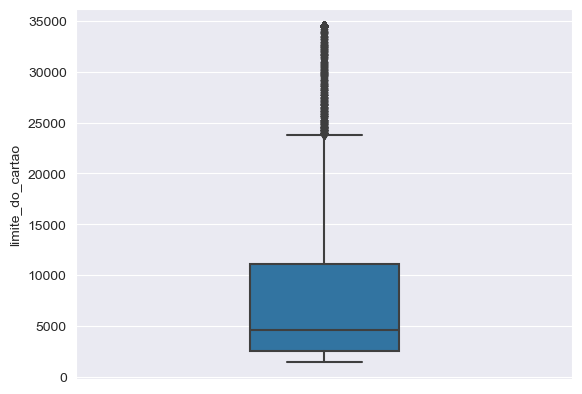

In [8]:
ax = sns.boxplot(data=dados, y='limite_do_cartao', width=0.3)

In [9]:
# metade dos dados se encontram abaixo de 4549
# neste caso será adotado clientes de alta renda acima de 4549 de limite de cartão de crédito

### Tratando a coluna limite de cartao

#### sendo 0 para limites menores que 4549, e 1 para limites maiores

In [10]:
menores = dados[dados.limite_do_cartao <= 4549]
menores

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao
2,51,M,3,Graduate,Married,$80K - $120K,3418
3,40,F,4,High School,Unknown,Less than $40K,3313
5,44,M,2,Graduate,Married,$40K - $60K,4010
14,57,F,2,Graduate,Married,Less than $40K,2436
15,44,M,4,Unknown,Unknown,$80K - $120K,4234
...,...,...,...,...,...,...,...
10106,58,F,0,Graduate,Single,Less than $40K,4299
10109,47,M,5,High School,Single,Less than $40K,4165
10121,56,F,1,Graduate,Single,Less than $40K,3688
10122,50,M,2,Graduate,Single,$40K - $60K,4003


In [11]:
menores.limite_do_cartao.describe()

count    5066.000000
mean     2623.410975
std       851.496598
min      1438.000000
25%      1915.000000
50%      2555.000000
75%      3222.750000
max      4549.000000
Name: limite_do_cartao, dtype: float64

In [12]:
menores['limite_do_cartao2'] = menores['limite_do_cartao'] * 0
menores

C:\Users\otaci\AppData\Local\Temp\ipykernel_10524\586567604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menores['limite_do_cartao2'] = menores['limite_do_cartao'] * 0


,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao,limite_do_cartao2
2,51,M,3,Graduate,Married,$80K - $120K,3418,0
3,40,F,4,High School,Unknown,Less than $40K,3313,0
5,44,M,2,Graduate,Married,$40K - $60K,4010,0
14,57,F,2,Graduate,Married,Less than $40K,2436,0
15,44,M,4,Unknown,Unknown,$80K - $120K,4234,0
...,...,...,...,...,...,...,...,...
10106,58,F,0,Graduate,Single,Less than $40K,4299,0
10109,47,M,5,High School,Single,Less than $40K,4165,0
10121,56,F,1,Graduate,Single,Less than $40K,3688,0
10122,50,M,2,Graduate,Single,$40K - $60K,4003,0


In [13]:
menores.drop(columns=['limite_do_cartao'], inplace=True)
menores.head()

C:\Users\otaci\AppData\Local\Temp\ipykernel_10524\3240060466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menores.drop(columns=['limite_do_cartao'], inplace=True)


,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2
2,51,M,3,Graduate,Married,$80K - $120K,0
3,40,F,4,High School,Unknown,Less than $40K,0
5,44,M,2,Graduate,Married,$40K - $60K,0
14,57,F,2,Graduate,Married,Less than $40K,0
15,44,M,4,Unknown,Unknown,$80K - $120K,0


In [14]:
maiores = dados[dados.limite_do_cartao > 4549]
maiores

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao
0,45,M,3,High School,Married,$60K - $80K,12691
1,49,F,5,Graduate,Single,Less than $40K,8256
4,40,M,3,Uneducated,Married,$60K - $80K,4716
6,51,M,4,Unknown,Married,$120K +,34516
7,32,M,0,High School,Unknown,$60K - $80K,29081
...,...,...,...,...,...,...,...
10119,55,F,3,Uneducated,Single,Unknown,14657
10120,54,M,1,High School,Single,$60K - $80K,13940
10124,44,F,1,High School,Married,Less than $40K,5409
10125,30,M,2,Graduate,Unknown,$40K - $60K,5281


In [15]:
maiores.limite_do_cartao.describe()

count     5061.000000
mean     14646.402490
std       9605.113479
min       4552.000000
25%       6973.000000
50%      11077.000000
75%      19995.000000
max      34516.000000
Name: limite_do_cartao, dtype: float64

In [16]:
maiores['limite_do_cartao2'] = maiores['limite_do_cartao'] * 0 + 1
maiores.head()

C:\Users\otaci\AppData\Local\Temp\ipykernel_10524\3855202346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maiores['limite_do_cartao2'] = maiores['limite_do_cartao'] * 0 + 1


,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao,limite_do_cartao2
0,45,M,3,High School,Married,$60K - $80K,12691,1
1,49,F,5,Graduate,Single,Less than $40K,8256,1
4,40,M,3,Uneducated,Married,$60K - $80K,4716,1
6,51,M,4,Unknown,Married,$120K +,34516,1
7,32,M,0,High School,Unknown,$60K - $80K,29081,1


In [17]:
maiores.drop(columns=['limite_do_cartao'], inplace=True)

C:\Users\otaci\AppData\Local\Temp\ipykernel_10524\1838454564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maiores.drop(columns=['limite_do_cartao'], inplace=True)


In [18]:
menores.head(2)

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2
2,51,M,3,Graduate,Married,$80K - $120K,0
3,40,F,4,High School,Unknown,Less than $40K,0


In [19]:
maiores.head(2)

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2
0,45,M,3,High School,Married,$60K - $80K,1
1,49,F,5,Graduate,Single,Less than $40K,1


# Juntando os dois dados para formar a coluna limite de cartão com 0 e 1 

In [20]:
dados = pd.merge(menores, maiores, how = 'outer')
dados

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2
0,51,M,3,Graduate,Married,$80K - $120K,0
1,51,M,3,Graduate,Married,$80K - $120K,0
2,40,F,4,High School,Unknown,Less than $40K,0
3,44,M,2,Graduate,Married,$40K - $60K,0
4,44,M,2,Graduate,Married,$40K - $60K,0
...,...,...,...,...,...,...,...
10122,55,F,3,Uneducated,Single,Unknown,1
10123,54,M,1,High School,Single,$60K - $80K,1
10124,44,F,1,High School,Married,Less than $40K,1
10125,30,M,2,Graduate,Unknown,$40K - $60K,1


In [21]:
# transformar os dependentes em uma string se não o merge não consegue trabalhar
dados['Dependentes'] = dados['Dependentes'].astype(str)

# Transformando os dados pelo get_dummies

In [22]:
dados_dumie = pd.get_dummies(dados.drop(['Idade','limite_do_cartao2'], axis=1)) 
# no drop coloca a coluna que não deseja que seja modificada com get_dummies axis=' coluna'

In [23]:
# Junção dos dados transformados com o que já tínhamos
dados_final = pd.concat([dados, dados_dumie], axis=1)
dados_final

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2,Sexo_F,Sexo_M,Dependentes_0,...,Estado_civil_Divorced,Estado_civil_Married,Estado_civil_Single,Estado_civil_Unknown,Renda_$120K +,Renda_$40K - $60K,Renda_$60K - $80K,Renda_$80K - $120K,Renda_Less than $40K,Renda_Unknown
0,51,M,3,Graduate,Married,$80K - $120K,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,51,M,3,Graduate,Married,$80K - $120K,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,40,F,4,High School,Unknown,Less than $40K,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,44,M,2,Graduate,Married,$40K - $60K,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,44,M,2,Graduate,Married,$40K - $60K,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,55,F,3,Uneducated,Single,Unknown,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
10123,54,M,1,High School,Single,$60K - $80K,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
10124,44,F,1,High School,Married,Less than $40K,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
10125,30,M,2,Graduate,Unknown,$40K - $60K,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [24]:
pd.set_option('display.max_columns', 39)
dados_final.head()

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2,Sexo_F,Sexo_M,Dependentes_0,Dependentes_1,Dependentes_2,Dependentes_3,Dependentes_4,Dependentes_5,Nivel_educacional_College,Nivel_educacional_Doctorate,Nivel_educacional_Graduate,Nivel_educacional_High School,Nivel_educacional_Post-Graduate,Nivel_educacional_Uneducated,Nivel_educacional_Unknown,Estado_civil_Divorced,Estado_civil_Married,Estado_civil_Single,Estado_civil_Unknown,Renda_$120K +,Renda_$40K - $60K,Renda_$60K - $80K,Renda_$80K - $120K,Renda_Less than $40K,Renda_Unknown
0,51,M,3,Graduate,Married,$80K - $120K,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,51,M,3,Graduate,Married,$80K - $120K,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,40,F,4,High School,Unknown,Less than $40K,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,44,M,2,Graduate,Married,$40K - $60K,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,44,M,2,Graduate,Married,$40K - $60K,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [25]:
dados_final.drop(columns=['Sexo', 'Dependentes','Nivel_educacional','Estado_civil','Renda'], inplace=True)
dados_final.head(2)
dados_final.to_csv('prontos2.csv')

In [26]:
dados_final = dados_final.rename(columns={'limite_do_cartao2':'Alta_Renda'})
dados_final.head(2)

,Idade,Alta_Renda,Sexo_F,Sexo_M,Dependentes_0,Dependentes_1,Dependentes_2,Dependentes_3,Dependentes_4,Dependentes_5,Nivel_educacional_College,Nivel_educacional_Doctorate,Nivel_educacional_Graduate,Nivel_educacional_High School,Nivel_educacional_Post-Graduate,Nivel_educacional_Uneducated,Nivel_educacional_Unknown,Estado_civil_Divorced,Estado_civil_Married,Estado_civil_Single,Estado_civil_Unknown,Renda_$120K +,Renda_$40K - $60K,Renda_$60K - $80K,Renda_$80K - $120K,Renda_Less than $40K,Renda_Unknown
0,51,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,51,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [27]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Idade                            10127 non-null  int64
 1   Alta_Renda                       10127 non-null  int32
 2   Sexo_F                           10127 non-null  uint8
 3   Sexo_M                           10127 non-null  uint8
 4   Dependentes_0                    10127 non-null  uint8
 5   Dependentes_1                    10127 non-null  uint8
 6   Dependentes_2                    10127 non-null  uint8
 7   Dependentes_3                    10127 non-null  uint8
 8   Dependentes_4                    10127 non-null  uint8
 9   Dependentes_5                    10127 non-null  uint8
 10  Nivel_educacional_College        10127 non-null  uint8
 11  Nivel_educacional_Doctorate      10127 non-null  uint8
 12  Nivel_educacional_Graduate       10127 non-nul

# Objetivo: Tentar Prever o Alta e baixo limite

In [28]:
X = dados_final.drop(['Alta_Renda'], axis=1)
y = dados_final['Alta_Renda']

In [29]:
# biblioteca para padronizar os dados(deixando todos os valores na mesma escala)
from sklearn.preprocessing import StandardScaler

In [30]:
normalizar = StandardScaler()

In [31]:
x_normalizado = normalizar.fit_transform(X) # Transformando os dados quando não são totalmente binários
x_normalizado

array([[ 0.58305837, -1.05995565,  1.05995565, ...,  2.36588126,
        -0.73643691, -0.35121215],
       [ 0.58305837, -1.05995565,  1.05995565, ...,  2.36588126,
        -0.73643691, -0.35121215],
       [-0.78912553,  0.9434357 , -0.9434357 , ..., -0.42267548,
         1.35788957, -0.35121215],
       ...,
       [-0.29014957,  0.9434357 , -0.9434357 , ..., -0.42267548,
         1.35788957, -0.35121215],
       [-2.03656544, -1.05995565,  1.05995565, ..., -0.42267548,
        -0.73643691, -0.35121215],
       [-0.41489356,  0.9434357 , -0.9434357 , ..., -0.42267548,
         1.35788957, -0.35121215]])

In [32]:
dados_final.head(1)

,Idade,Alta_Renda,Sexo_F,Sexo_M,Dependentes_0,Dependentes_1,Dependentes_2,Dependentes_3,Dependentes_4,Dependentes_5,Nivel_educacional_College,Nivel_educacional_Doctorate,Nivel_educacional_Graduate,Nivel_educacional_High School,Nivel_educacional_Post-Graduate,Nivel_educacional_Uneducated,Nivel_educacional_Unknown,Estado_civil_Divorced,Estado_civil_Married,Estado_civil_Single,Estado_civil_Unknown,Renda_$120K +,Renda_$40K - $60K,Renda_$60K - $80K,Renda_$80K - $120K,Renda_Less than $40K,Renda_Unknown
0,51,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [33]:
# Exemplo para teste
XTales = [[35,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0]]

In [34]:
# transformando em um conjunto de linhas e colunas
XTales_normalizado = normalizar.transform(pd.DataFrame(XTales, columns = X.columns))

# Trabalhando com a distância euclideana 

In [35]:
import numpy as np

In [36]:
a = XTales_normalizado
b = x_normalizado[0]

In [37]:
a - b # A distancia do tales com primeiro valor do datframe

array([[-1.99590385,  0.        ,  0.        ,  3.50719966,  0.        ,
         0.        , -2.25305282,  0.        ,  0.        ,  0.        ,
         0.        , -2.16435971,  0.        ,  0.        ,  2.82532527,
         0.        ,  0.        , -2.0055518 ,  0.        ,  3.82106818,
         0.        ,  0.        ,  0.        , -2.78855674,  2.09432648,
         0.        ]])

In [38]:
# realizando a exponenciação e somando
np.sum(np.square(a-b))

64.81229668432975

In [39]:
# tiramos a raiz e temos a nossa distância, a distância do tales com o primeiro dado
np.sqrt(np.sum(np.square(a-b)))

8.050608466714163

# Implementando o modelo 

In [40]:
# Biblioteca para divisão dos dados 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_normalizado, y, test_size=0.3, random_state=99, stratify=y)

# Classificador KNN

In [41]:
# Biblioteca para criar o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Instanciando o modelo (criamos o modelos ) - por padrão são 5 vizinhos k
knn = KNeighborsClassifier(metric='euclidean')# distância euclideana

In [43]:
# treinando o modelo com os dados de treino
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [44]:
# testanto o modelo com os dados de teste 
predito_knn = knn.predict(X_test)
predito_knn

C:\Users\otaci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, ..., 1, 1, 0])

# Método Probabilísitco 
## Modelo Bernoulli Naive Bayes

In [45]:
# utilizar mediana, pq é o valor central dos nossos dados ordenados
np.median(X_train)

-0.3333881894734782

In [46]:
# Biblioteca para criar o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [47]:
# criando o modelo 
bnb = BernoulliNB(binarize=np.median(X_train))
# o binarize define o limite para transformar o valor em binário ou não
# define que acima desse valor transforma em 1 e abaixo em 0 

In [48]:
bnb.fit(X_train, y_train)

BernoulliNB(binarize=-0.3333881894734782)

In [49]:
previsao_Bnb = bnb.predict(X_test)

In [50]:
previsao_Bnb

array([0, 1, 0, ..., 0, 1, 0])

# Árvorde de decisão

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3) # maximo de 3 ligações

In [53]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [54]:
# verificando a importância de cada atributo
modelo.feature_importances_

array([0.01121213, 0.03802231, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.24146698, 0.        , 0.        , 0.67371455,
       0.03558404])

In [55]:
previsao_arvoredecisao = modelo.predict(X_test)

In [56]:
previsao_arvoredecisao

array([1, 1, 0, ..., 1, 1, 0])

# Validação dos Modelos

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
print(confusion_matrix(y_test, predito_knn))

[[1041  479]
 [ 494 1025]]


In [59]:
print(confusion_matrix(y_test, previsao_Bnb))

[[1085  435]
 [ 514 1005]]


In [60]:
print(confusion_matrix(y_test, previsao_arvoredecisao))

[[1017  503]
 [ 360 1159]]


# Acurácia 

In [61]:
from sklearn.metrics import accuracy_score
# mostra a percentagem de acerto 

In [62]:
# modelo knn
print('O modelo KNN possui {:.2f} % de acerto'.format(accuracy_score(y_test, predito_knn)*100))

O modelo KNN possui 67.98 % de acerto


In [63]:
# modelo Bernoulli de Naives bayes
print('O modelo BNb possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_Bnb)*100))

O modelo BNb possui 68.77 % de acerto


In [64]:
# modelo árvore de decisão
print('O modelo tree decision possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_arvoredecisao)*100))

O modelo tree decision possui 71.60 % de acerto


# Precisão

In [65]:
from sklearn.metrics import precision_score

In [66]:
# modelo knn
print('O modelo KNN possui {:.2f} % de precisão.'.format(precision_score(y_test, predito_knn)*100))

O modelo KNN possui 68.15 % de precisão.


In [67]:
# modelo Bernoulli de Naives bayes
print('O modelo BNb possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_Bnb)*100))

O modelo BNb possui 69.79 % de precisão


In [68]:
# modelo árvore de decisão
print('O modelo tree decision possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_arvoredecisao)*100))

O modelo tree decision possui 69.74 % de precisão


# Recall 

In [69]:
# recall mede o quão bom nosso modelo em classificar os resultados realmente em verdadeiros positivos(sensibilidade)
from sklearn.metrics import recall_score

In [70]:
# modelo knn
print('O modelo KNN possui {:.2f} % de recall.'.format(recall_score(y_test, predito_knn)*100))

O modelo KNN possui 67.48 % de recall.


In [71]:
# modelo Bernoulli de Naives bayes
print('O modelo BNb possui {:.2f} % de recall'.format(recall_score(y_test, previsao_Bnb)*100))

O modelo BNb possui 66.16 % de recall


In [72]:
# modelo árvore de decisão
print('O modelo tree decision possui {:.2f} % de recall'.format(recall_score(y_test, previsao_arvoredecisao)*100))

O modelo tree decision possui 76.30 % de recall


# Escolhendo o melhor modelo de acordo com os dados e a análise

In [73]:
# O melhor modelo de acordo com a análise feita e os dados disponíveis é a árvore de decisão:

print('O modelo tree decision possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_arvoredecisao)*100))
print('O modelo tree decision possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_arvoredecisao)*100))
print('O modelo tree decision possui {:.2f} % de recall'.format(recall_score(y_test, previsao_arvoredecisao)*100))

O modelo tree decision possui 71.60 % de acerto
O modelo tree decision possui 69.74 % de precisão
O modelo tree decision possui 76.30 % de recall


In [74]:
modelo = [['KNN',67.98,68.15,67.48],
            ['BNB',68.77,69.79,66.16],
            ['Tree',71.60,69.74,76.30]]

df = pd.DataFrame(modelo, columns=['Modelo', 'Acuracia', 'Precisao', 'Recall'])

df

,Modelo,Acuracia,Precisao,Recall
0,KNN,67.98,68.15,67.48
1,BNB,68.77,69.79,66.16
2,Tree,71.60,69.74,76.30


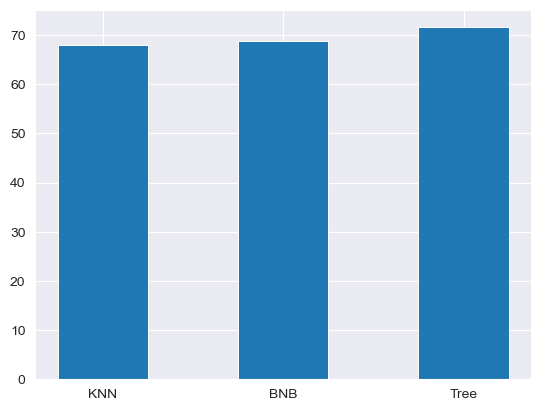

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(df['Modelo'], df['Acuracia'], width=0.5, edgecolor="white", linewidth=0.7)
plt.show()

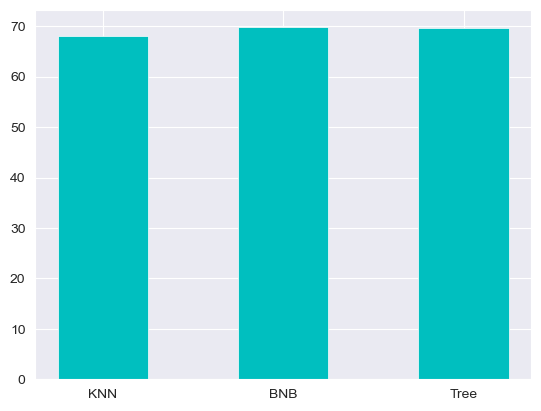

In [76]:
fig, ax = plt.subplots()
ax.bar(df['Modelo'], df['Precisao'], width=0.5, edgecolor="white", linewidth=0.5, color='c' )
plt.show()

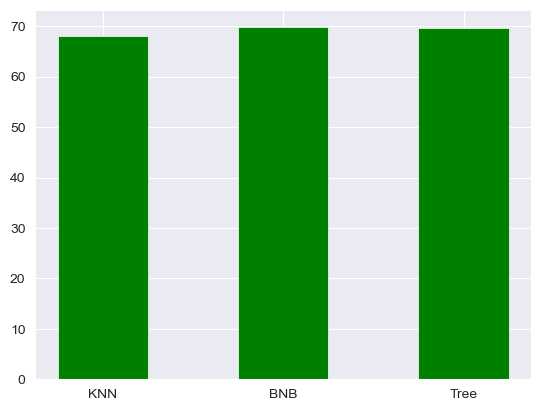

In [77]:
fig, ax = plt.subplots()
ax.bar(df['Modelo'], df['Precisao'], width=0.5, edgecolor="white", linewidth=0.5, color='g' )
plt.show()

# Parte II - Tentativa de Melhorar o modelo 

In [78]:
### Adicionando o modelo Random Forest Classifier 

In [79]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train,y_train)
previsao_RFC = RFC.predict(X_test)

print('A Acurácia do modelo RandomForestClassifier é de {:.2f} %'.format(RFC.score(X_test,y_test)*100))

A Acurácia do modelo RandomForestClassifier é de 65.32 %


### Selecionando as melhores variáveis e reduzindo o modelo 

In [80]:
from sklearn.feature_selection import SelectKBest, chi2 

X = dados_final.drop(['Alta_Renda'], axis=1)
y = dados_final['Alta_Renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

melhores = SelectKBest(chi2, k=10) # k é o número de variáveis a serem selecionadas no caso as 10 melhores, influentes
melhores # a chi2 não aceita valores negativos

SelectKBest(score_func=<function chi2 at 0x00000225293A6B80>)

In [81]:
melhores.fit(X_train,y_train)

SelectKBest(score_func=<function chi2 at 0x00000225293A6B80>)

In [82]:
# transformando e selecionando 5 variáveis
treino_kbest = melhores.transform(X_train)
teste_kbest = melhores.transform(X_test)

In [83]:
# Importando o RandomForestClassifier um conjunto de árvores de decisão, testando novamente

RFC_atual = RandomForestClassifier(n_estimators=100, random_state=42)
RFC_atual.fit(treino_kbest,y_train)
previsao_RFC_atual = RFC_atual.predict(teste_kbest)
# calculando a acurácia
print('A Acurácia do modelo RandomForestClassifier é de {:.2f} %'.format(RFC_atual.score(teste_kbest,y_test)*100))

A Acurácia do modelo RandomForestClassifier é de 71.50 %


In [84]:
# Isso demonstra que o modelo RandomForestClassifier utilizando somente 10 variáveis consegue prever quase o mesmo que 
# a árvore de decisão utilizando todas.
# essa atitude nesse caso diminui recursos a serem utilizados e o tempo perguntando ao futuro cliente, simplificando o 
# atendimento

# Seleção das variáveis com RFECV

In [85]:
# Maximizando o modelo com RFECV, porém consome mais recursos computacionais
from sklearn.feature_selection import RFECV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classificador = RandomForestClassifier(n_estimators=100, random_state=42)

classificador.fit(X_train,y_train)

selector = RFECV(estimator = classificador, cv=5, step=1, scoring='accuracy') # step -> passos no caso somente 1

selector.fit(X_train,y_train)

treino_rfecv = selector.transform(X_train)
teste_rfecv = selector.transform(X_test)

classificador.fit(treino_rfecv,y_train)
predicao = classificador.predict(teste_rfecv)

# calculando a acurácia
print('Resultado da Classificação de {:.2f} %'.format(classificador.score(teste_rfecv,y_test)*100))

Resultado da Classificação de 71.34 %


In [86]:
matriz = confusion_matrix(y_test,predicao)
matriz

array([[1066,  454],
       [ 417, 1102]], dtype=int64)

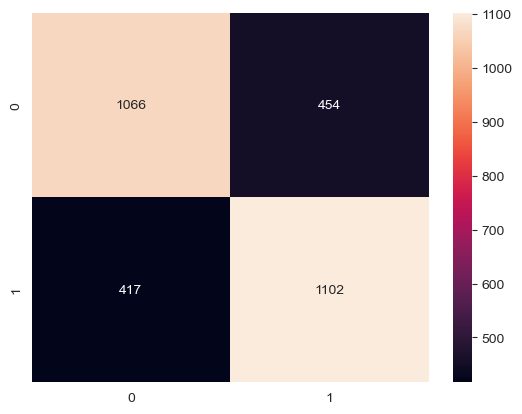

In [87]:
import seaborn as sns
ax = sns.heatmap(matriz, annot=True, fmt='d')
# cada análise de 1520 clientes de baixa renda o modelo acerta 1066
# cada análise de 1519 clientes de alta renda o modelo acerta 1102
# Possuindo 71% de precisão

In [88]:
selector.n_features_ # ele selecionou 5 variáveis para ter o melhore resultado possível

5

In [89]:
selector.support_ # as variáveis que o algoritmo selecionou 

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False])

In [90]:
X_train.columns[selector.support_] # As variáveis selecionadas 

Index(['Idade', 'Sexo_F', 'Sexo_M', 'Renda_$40K - $60K',
       'Renda_Less than $40K'],
      dtype='object')

In [91]:
len(selector.grid_scores_)

C:\Users\otaci\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


26

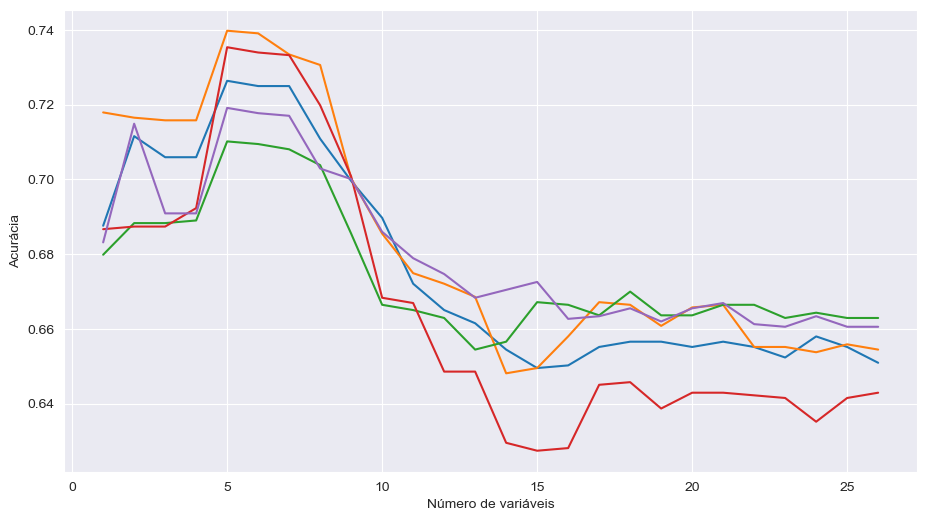

In [92]:
plt.figure(figsize=(11,6))
plt.xlabel('Número de variáveis')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selector.grid_scores_)+1),selector.grid_scores_ )
plt.show()

In [93]:
# Com essa análise podemos resumir o modelo a 5 variáveis, maximizando recursos e diminuindo perguntas ao cliente

# Nova Conclusão 

In [94]:
print('O modelo TREE DECISION possui 71.60 % de acerto')
print('                                                                             ')
print('-----------------------------------------------------------------------------')
print('                                                                             ')
print('O modelo RANDOM FOREST reduzido a 5 melhores variáveis possui {:.2f} % de acerto'
      .format(classificador.score(teste_rfecv,y_test)*100))
print('                                                                             ')
print('-----------------------------------------------------------------------------')
print('                                                                             ')
print('TREE DECISION ---> 71.60%')
print('RANDOM FOREST ---> 71.34%')

O modelo TREE DECISION possui 71.60 % de acerto
                                                                             
-----------------------------------------------------------------------------
                                                                             
O modelo RANDOM FOREST reduzido a 5 melhores variáveis possui 71.34 % de acerto
                                                                             
-----------------------------------------------------------------------------
                                                                             
TREE DECISION ---> 71.60%
RANDOM FOREST ---> 71.34%


In [95]:
## Resumo:

# Apesar dos dois modelos satisfazerem a necessidade devemos escolher o Random Forest devido o menor nível 
# de informação(variáveis), com menos dados, ou seja menos perguntas íntimas aos clientes podemos prever se esse possui
# alta renda e pouca possibilidade de endividamento podendo ter limites maiores do cartão de crédito

# Reduzindo a 5 variáveis a árvore de decisão

In [ ]:
variáveis = ['Idade', 'Sexo_F', 'Sexo_M', 'Renda_$40K - $60K',
       'Renda_Less than $40K'

In [97]:
dados.head(3)

,Idade,Sexo,Dependentes,Nivel_educacional,Estado_civil,Renda,limite_do_cartao2
0,51,M,3,Graduate,Married,$80K - $120K,0
1,51,M,3,Graduate,Married,$80K - $120K,0
2,40,F,4,High School,Unknown,Less than $40K,0


In [101]:
dataset = dados_final[['Idade', 'Sexo_F', 'Sexo_M', 'Renda_$40K - $60K','Renda_Less than $40K']]
dataset

,Idade,Sexo_F,Sexo_M,Renda_$40K - $60K,Renda_Less than $40K
0,51,0,1,0,0
1,51,0,1,0,0
2,40,1,0,0,1
3,44,0,1,1,0
4,44,0,1,1,0
...,...,...,...,...,...
10122,55,1,0,0,0
10123,54,0,1,0,0
10124,44,1,0,0,1
10125,30,0,1,1,0


In [102]:
# Biblioteca para divisão dos dados 
from sklearn.model_selection import train_test_split
x = dataset[['Idade', 'Sexo_F', 'Sexo_M', 'Renda_$40K - $60K','Renda_Less than $40K']]
y= dados['limite_do_cartao2']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=99, stratify=y)

In [118]:
# Previsão com as melhores variáveis para o modelo de decision tree
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)
modelo.fit(X_train, y_train)
previsao_arvoredecisao = modelo.predict(X_test)
# modelo árvore de decisão
print('O modelo tree decision possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_arvoredecisao)*100))

O modelo tree decision possui 72.06 % de acerto


In [130]:
# Previsão com as melhores variáveis para o modelo de randomforest
modelo = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=6)
modelo.fit(X_train, y_train)
previsao_rf = modelo.predict(X_test)
# modelo árvore de decisão
print('O modelo tree decision possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_rf)*100))

O modelo tree decision possui 71.77 % de acerto


In [131]:
print('O modelo tree decision com 5 variáveis possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_arvoredecisao)*100))
print('O modelo tree decision com 5 variáveis possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_arvoredecisao)*100))
print('O modelo tree decision com 5 variáveis possui {:.2f} % de recall'.format(recall_score(y_test, previsao_arvoredecisao)*100))

O modelo tree decision com 5 variáveis possui 72.06 % de acerto
O modelo tree decision com 5 variáveis possui 71.36 % de precisão
O modelo tree decision com 5 variáveis possui 73.67 % de recall


In [132]:
print('O modelo Random Forest com 5 variáveis possui {:.2f} % de acerto'.format(accuracy_score(y_test, previsao_rf)*100))
print('O modelo Random Forest com 5 variáveis possui {:.2f} % de precisão'.format(precision_score(y_test, previsao_rf)*100))
print('O modelo Random Forest com 5 variáveis possui {:.2f} % de recall'.format(recall_score(y_test, previsao_rf)*100))

O modelo Random Forest com 5 variáveis possui 71.77 % de acerto
O modelo Random Forest com 5 variáveis possui 70.26 % de precisão
O modelo Random Forest com 5 variáveis possui 75.44 % de recall
